<a href="https://colab.research.google.com/github/jailer2024/JAILER-CHAPID-SE-ALES-Y-SISTEMAS/blob/main/taller_jueves_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PUNTO 1**

In [1]:

!pip install sympy --upgrade #actualizar sympy para usar módulo de control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cud

In [2]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.8 MB/s eta 0:00:00


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

#**Teniendo en cuenta la forma canonica**

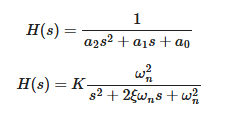

In [4]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H


       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

#**Calculando los polos**

In [5]:


p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1


                      _____________
                     ╱     2       
                    ╱     c        
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m               √m             

#**Para un sistema amortiguado asumimos los siguientes valores**

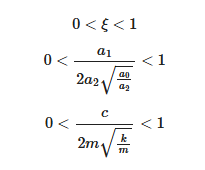

#**Asumimos los valores de m=4 ; c=1 ; k=1**

In [6]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck


{c: 1.0, k: 1.0, m: 4.0}

#**Polos y ceros**

In [7]:

print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


# **EL TIEMPO DE ESTABLECIMIENTO**

In [8]:
t_s = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  24.0000000000000


**GRAFICA DE POLOS Y CEROS**

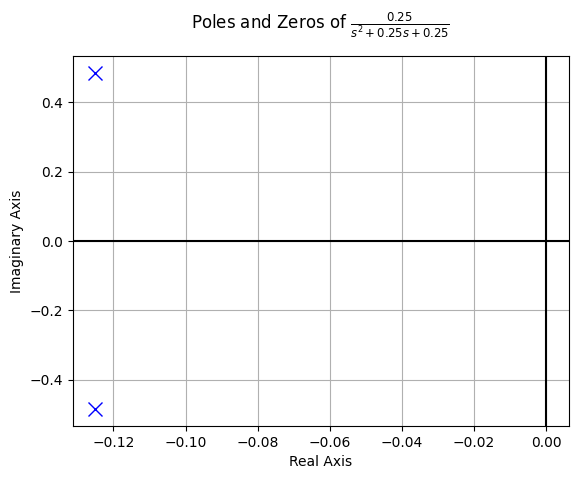

In [9]:

from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
import control as ctrl
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

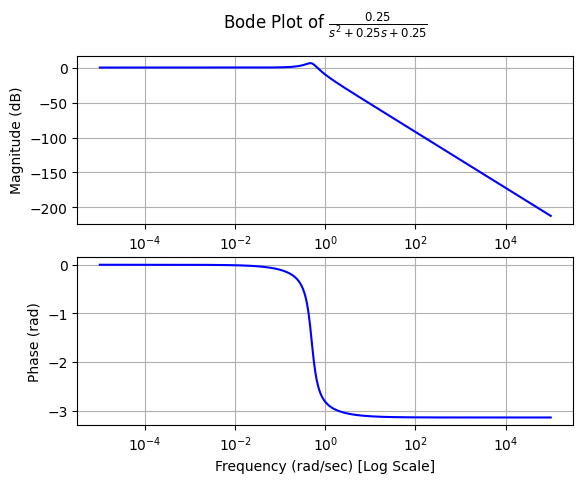

In [10]:
bode_plot(tf1)

#**Respuesta impulso**

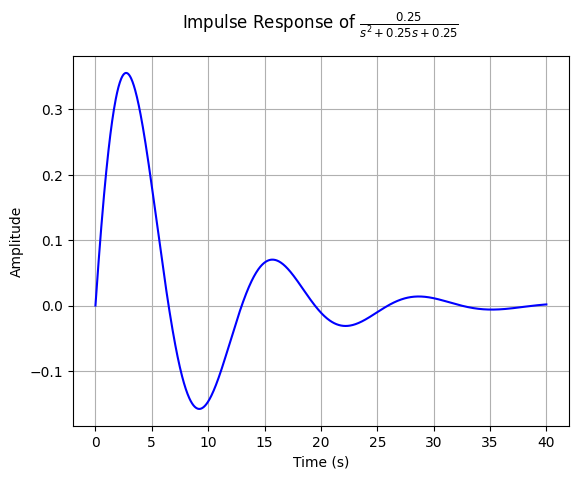

In [11]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Tiempo pico**

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

2.8282828282828287

#**Respuesta al ewscalon**

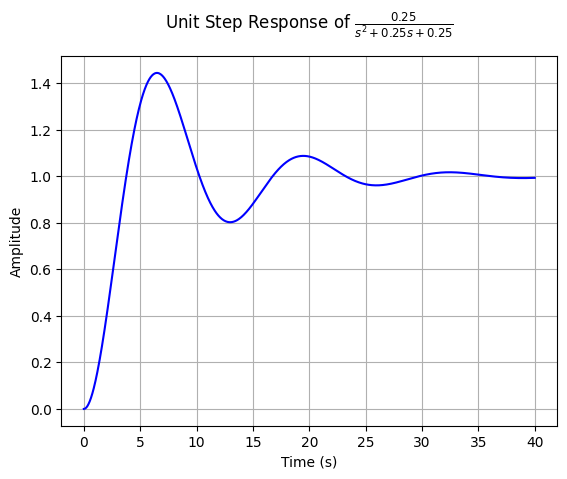

In [13]:

step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Tiempo pico**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = step((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

6.222222222222223

#**Respuesta rampa**

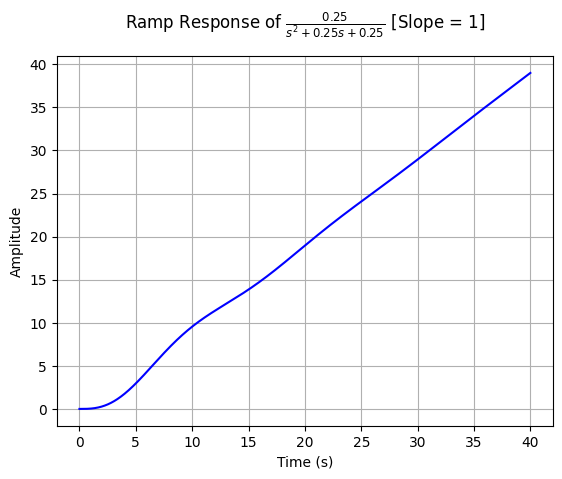

In [15]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Para el sisema de amortiguamiento critico:**

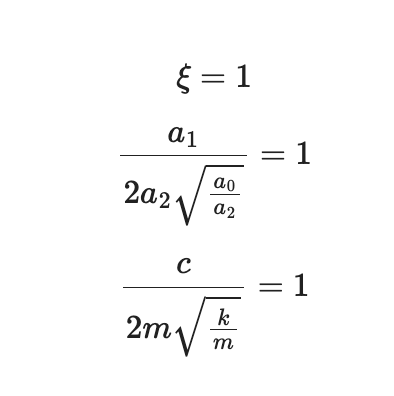

#**Asumimos los valores de :**

In [16]:
#Reemplazando valores
mck = {m: 1.0, c: 2.0, k: 1.0}
mck

{c: 2.0, k: 1.0, m: 1.0}

#**polos y ceros**

In [17]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.00000000000000
p2= -1.00000000000000
xi= 1.00000000000000
omega_n= 1.00000000000000


#**Tiempo de establacimiento**

In [18]:
t_s2 = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  3.00000000000000


#**Grafica de ceros y polos con sympy**

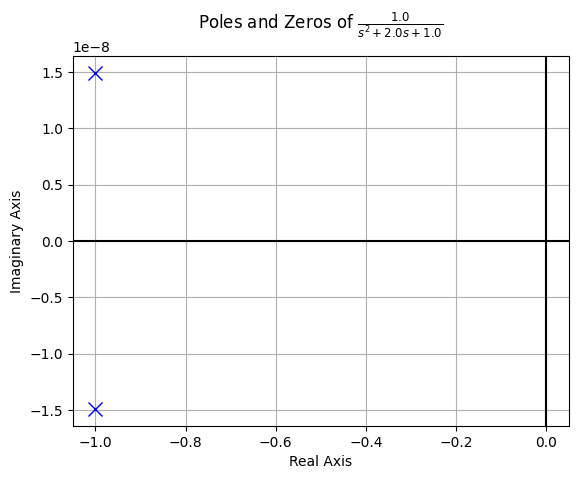

In [19]:
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerador y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

#**Diagrama de bode**





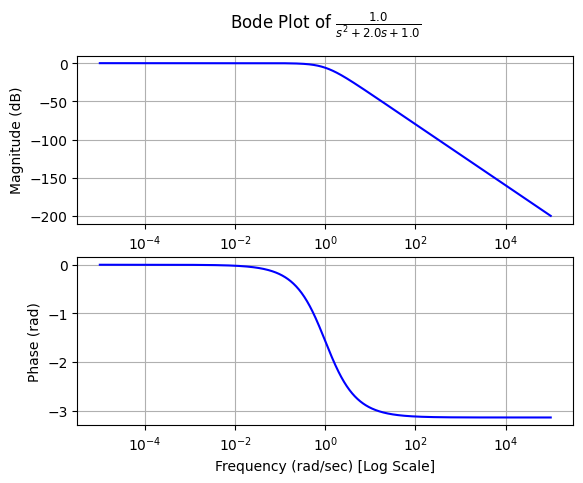

In [20]:
bode_plot(tf1)

#**Respuesta impulso**

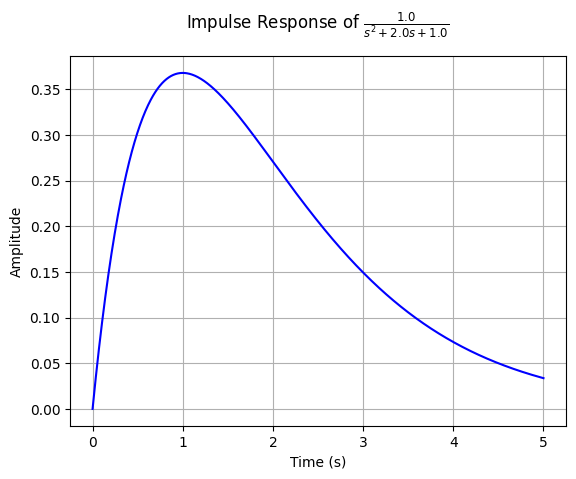

In [21]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Tiempo pico**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [1, 2, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp


#**Respuesta al escalon**

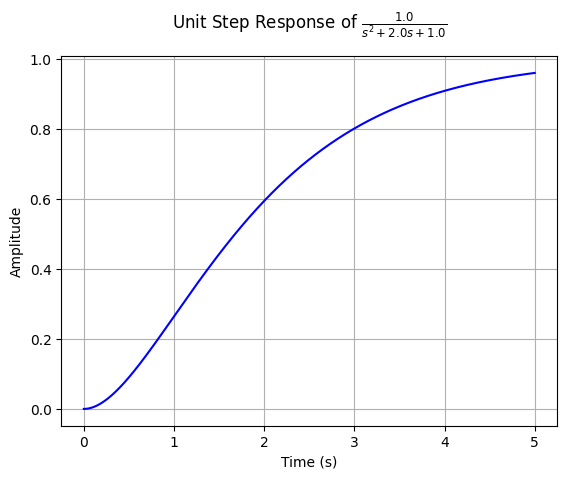

In [22]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Respuesta rampa**

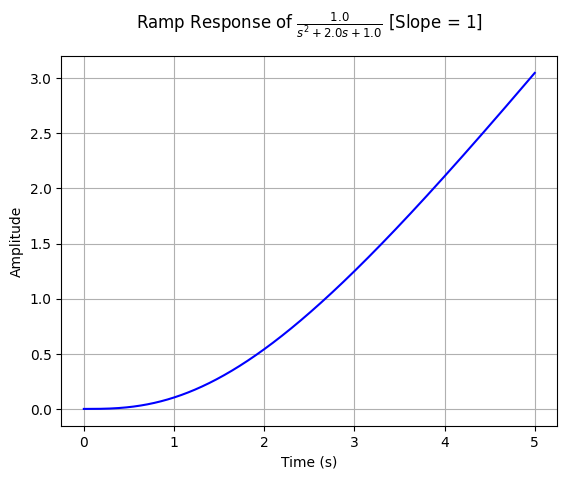

In [23]:

ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))